In [1]:
print("!! Jai Ganesh !!")

!! Jai Ganesh !!


## Olympic Data 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 1C0B-77D4

 Directory of C:\Users\pkana\Data Science Individual Projects\Olympic Data

26-05-2022  09:04 PM    <DIR>          .
26-05-2022  10:47 AM    <DIR>          ..
26-05-2022  10:47 AM    <DIR>          .ipynb_checkpoints
26-05-2022  06:31 PM            49,563 gold performance.png
26-05-2022  10:46 AM        19,938,021 olympic_athletes.csv
26-05-2022  10:46 AM             4,979 olympic_hosts.csv
26-05-2022  10:46 AM         3,109,759 olympic_medals.csv
26-05-2022  10:46 AM        24,040,311 olympic_results.csv
26-05-2022  10:46 AM        25,443,070 olympic_results.pkl
26-05-2022  09:04 PM           462,089 Untitled.ipynb
               7 File(s)     73,047,792 bytes
               3 Dir(s)  370,201,661,440 bytes free


In [4]:
athletes=pd.read_csv("olympic_athletes.csv")
hosts=pd.read_csv("olympic_hosts.csv")
medals=pd.read_csv("olympic_medals.csv")
results=pd.read_csv("olympic_results.csv")

In [5]:
pd.set_option('display.max_columns', None)

### Athletes

In [6]:
athletes.head()

,athlete_url,athlete_full_name,games_participations,first_game,athlete_year_birth,athlete_medals,bio
0,https://olympics.com/en/athletes/cooper-woods-...,Cooper WOODS-TOPALOVIC,1,Beijing 2022,2000.0,NaN,NaN
1,https://olympics.com/en/athletes/elofsson,Felix ELOFSSON,2,PyeongChang 2018,1995.0,NaN,NaN
2,https://olympics.com/en/athletes/dylan-walczyk,Dylan WALCZYK,1,Beijing 2022,1993.0,NaN,NaN
3,https://olympics.com/en/athletes/olli-penttala,Olli PENTTALA,1,Beijing 2022,1995.0,NaN,NaN
4,https://olympics.com/en/athletes/reikherd,Dmitriy REIKHERD,1,Beijing 2022,1989.0,NaN,NaN


In [7]:
athletes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75904 entries, 0 to 75903
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   athlete_url           75904 non-null  object 
 1   athlete_full_name     75904 non-null  object 
 2   games_participations  75904 non-null  int64  
 3   first_game            75882 non-null  object 
 4   athlete_year_birth    73448 non-null  float64
 5   athlete_medals        15352 non-null  object 
 6   bio                   22842 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 4.1+ MB


In [8]:
athletes.describe()

,games_participations,athlete_year_birth
count,75904.000000,73448.000000
mean,1.535874,1961.619377
std,0.854563,28.129576
min,0.000000,1836.000000
25%,1.000000,1946.000000
50%,1.000000,1968.000000
75%,2.000000,1983.000000
max,10.000000,2009.000000


In [9]:
athletes=pd.read_csv("olympic_athletes.csv")

In [10]:
athletes=athletes.drop('athlete_url',axis=1)

In [11]:
athletes=athletes.drop('bio',axis=1)

In [12]:
athletes.head()

,athlete_full_name,games_participations,first_game,athlete_year_birth,athlete_medals
0,Cooper WOODS-TOPALOVIC,1,Beijing 2022,2000.0,NaN
1,Felix ELOFSSON,2,PyeongChang 2018,1995.0,NaN
2,Dylan WALCZYK,1,Beijing 2022,1993.0,NaN
3,Olli PENTTALA,1,Beijing 2022,1995.0,NaN
4,Dmitriy REIKHERD,1,Beijing 2022,1989.0,NaN


In [13]:
(athletes['athlete_medals'].count()/len(athletes))*100

20.225548060708263

In [14]:
#around 80% data of 'athlete_medals' is missing, lets drop the column
athletes=athletes.drop('athlete_medals',axis=1)

Lets check age of athlete at time of first game

In [15]:
athletes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75904 entries, 0 to 75903
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   athlete_full_name     75904 non-null  object 
 1   games_participations  75904 non-null  int64  
 2   first_game            75882 non-null  object 
 3   athlete_year_birth    73448 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 2.3+ MB


In [16]:
athletes=athletes.dropna(axis=0)

In [17]:
athletes.isnull().sum()

athlete_full_name       0
games_participations    0
first_game              0
athlete_year_birth      0
dtype: int64

In [18]:
athletes

,athlete_full_name,games_participations,first_game,athlete_year_birth
0,Cooper WOODS-TOPALOVIC,1,Beijing 2022,2000.0
1,Felix ELOFSSON,2,PyeongChang 2018,1995.0
2,Dylan WALCZYK,1,Beijing 2022,1993.0
3,Olli PENTTALA,1,Beijing 2022,1995.0
4,Dmitriy REIKHERD,1,Beijing 2022,1989.0
...,...,...,...,...
75899,Douglas WEIGLE,1,Innsbruck 1976,1955.0
75900,Stefania BERTELE,1,Innsbruck 1976,1957.0
75901,Walter CECCONI,1,Innsbruck 1976,1957.0
75902,Susan KELLEY,1,Innsbruck 1976,1954.0


In [19]:
athletes['first_game_year']=athletes['first_game'].apply(lambda x:x.split(" ")[-1])

In [20]:
athletes['athlete_year_birth']=athletes['athlete_year_birth'].astype(int)

In [21]:
athletes['first_game_year']=athletes['first_game_year'].astype(int)

In [22]:
athletes['athletes_age']=athletes['first_game_year']-athletes['athlete_year_birth']

In [23]:
athletes.head()

,athlete_full_name,games_participations,first_game,athlete_year_birth,first_game_year,athletes_age
0,Cooper WOODS-TOPALOVIC,1,Beijing 2022,2000,2022,22
1,Felix ELOFSSON,2,PyeongChang 2018,1995,2018,23
2,Dylan WALCZYK,1,Beijing 2022,1993,2022,29
3,Olli PENTTALA,1,Beijing 2022,1995,2022,27
4,Dmitriy REIKHERD,1,Beijing 2022,1989,2022,33


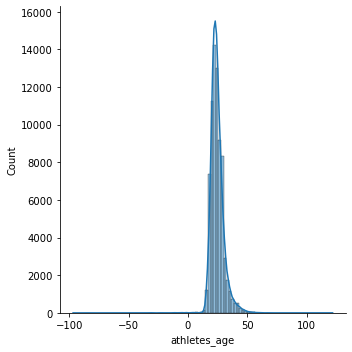

In [24]:
sns.displot(x=athletes['athletes_age'],bins=100,kde=True)


umm... Something is wrong here...

lets zoom-in

(0.0, 10.0)

<Figure size 1210x847 with 0 Axes>

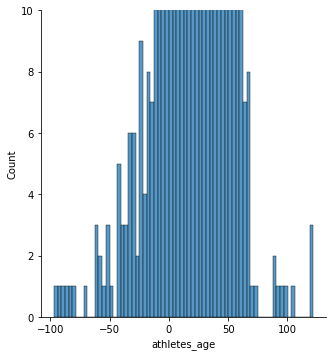

In [25]:
plt.figure(figsize=(10,7),dpi=121)
sns.displot(x=athletes['athletes_age'],bins=70)
plt.ylim(0,10)

In [26]:
athletes['athletes_age'].unique()

array([ 22,  23,  29,  27,  33,  20,  21,  26,  18,  28,  30,  19,  24,
        17,  25,  16,  32,  31,   4,  35,  12,  34,   7,  14,  39,  37,
       -24, -61,  44, 122, -11, -12,   8,  -9,  38,  40,  36,  43,  41,
        57,  42,  45,  54,  48,  15,  52,  13,  11,  -8,  46, -43,  49,
        51, -31,  -7, -14,   3, -41,  -1,  47,  56,  50,  62,  60,  55,
       106,  64,  53,  10, 121,  70,  97,  61,  67,  58,   1,   6,  -5,
        -2,   2, -10,  93,  -4,   9,  96,   5, -13,  63,  -3, -15,  -6,
        89,  73, -17, -16,  66, -21, -20, -22,  59, -18,  68, -25, -30,
       -28, -34, -33, -23,  65, -37, -35, -32, -39, -42, -51, -56, -57,
       -52, -47, -19, -71, -40, -53, -82, -80, -92, -89, -97, -59, -85,
         0])

In [27]:
athletes[athletes['athletes_age']<0].index

Int64Index([ 1008,  1134,  1619,  1635,  1848,  3577,  5284,  5313,  5718,
             5867,
            ...
            67781, 67816, 67828, 67839, 68092, 68872, 72700, 73121, 73910,
            75301],
           dtype='int64', length=125)

**Hmmm..False Information!!** (how one can participate in game before birth???)

lets delete that data!

In [28]:
athletes=athletes.drop(index=athletes[athletes['athletes_age']<0].index,axis=0)

In [29]:
athletes['athletes_age'].sort_values(ascending=True)

73896      0
66823      1
22425      1
30990      2
54160      2
        ... 
18193     97
12626    106
15300    121
1476     122
1470     122
Name: athletes_age, Length: 73304, dtype: int32

(0.0, 25.0)

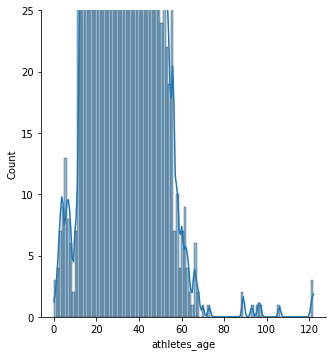

In [30]:
sns.displot(x=athletes['athletes_age'],bins=100,kde=True)
plt.ylim(0,25)

there are still outliers,lets consider athletes age between 12-85 age

In [31]:
athletes[(athletes['athletes_age']>85) | (athletes['athletes_age']<12)].index

Int64Index([  160,   602,  1470,  1476,  1699,  3312,  6019,  6929, 12626,
            15020, 15300, 17636, 18193, 21902, 22425, 23274, 23930, 25919,
            26064, 26785, 27099, 28326, 28390, 29229, 29399, 30007, 30990,
            31542, 31777, 32320, 32337, 32446, 33480, 33595, 34218, 34810,
            34975, 35168, 35510, 35666, 35742, 36055, 36332, 36782, 37205,
            38136, 38925, 39525, 39638, 41484, 42439, 45747, 46211, 46839,
            49736, 51101, 51229, 51306, 53065, 54160, 54714, 60661, 63175,
            66823, 66857, 68925, 70140, 71542, 71634, 72801, 72922, 73481,
            73896, 75868],
           dtype='int64')

In [32]:
athletes=athletes.drop(index=athletes[(athletes['athletes_age']>85) | (athletes['athletes_age']<12)].index,axis=0)

<Figure size 1210x1210 with 0 Axes>

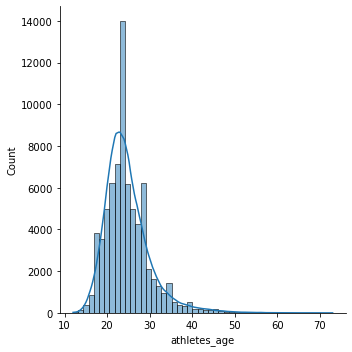

In [33]:
plt.figure(figsize=(10,10),dpi=121)
sns.displot(x=athletes['athletes_age'],bins=50,kde=True)


In [34]:
athletes.describe()

,games_participations,athlete_year_birth,first_game_year,athletes_age
count,73230.000000,73230.000000,73230.000000,73230.000000
mean,1.551932,1961.569726,1986.291411,24.721685
std,0.862504,28.122099,27.202484,5.383671
min,1.000000,1836.000000,1896.000000,12.000000
25%,1.000000,1945.000000,1972.000000,21.000000
50%,1.000000,1968.000000,1992.000000,24.000000
75%,2.000000,1983.000000,2008.000000,27.000000
max,10.000000,2008.000000,2022.000000,73.000000


In [35]:
#Average Participant's age per season
athletes.groupby('first_game_year').mean()['athletes_age']

first_game_year
1896    23.666667
1900    27.180556
1904    26.787879
1908    27.243856
1912    27.078580
1920    27.361328
1924    26.253521
1928    24.389338
1932    24.237354
1936    25.753529
1948    27.132098
1952    26.193802
1956    24.521770
1960    25.228411
1964    24.636807
1968    24.393506
1972    24.921321
1976    24.033048
1980    23.719160
1984    24.129860
1988    23.952225
1992    24.176152
1994    22.992565
1996    24.728601
1998    23.669643
2000    24.525437
2002    24.501082
2004    24.497797
2006    24.041916
2008    24.548436
2010    24.269006
2012    24.701921
2014    23.907997
2016    25.212357
2018    23.990792
2020    25.352245
2022    24.311665
Name: athletes_age, dtype: float64

In [36]:
athletes.head()

,athlete_full_name,games_participations,first_game,athlete_year_birth,first_game_year,athletes_age
0,Cooper WOODS-TOPALOVIC,1,Beijing 2022,2000,2022,22
1,Felix ELOFSSON,2,PyeongChang 2018,1995,2018,23
2,Dylan WALCZYK,1,Beijing 2022,1993,2022,29
3,Olli PENTTALA,1,Beijing 2022,1995,2022,27
4,Dmitriy REIKHERD,1,Beijing 2022,1989,2022,33


Relation between age and no. of game participated

<AxesSubplot:xlabel='athletes_age', ylabel='games_participations'>

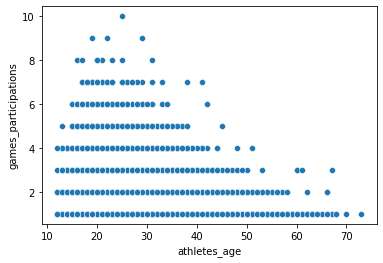

In [37]:
sns.scatterplot(x=athletes['athletes_age'],y=athletes['games_participations'])

### Hosts

In [38]:
hosts.head()

,game_slug,game_end_date,game_start_date,game_location,game_name,game_season,game_year
0,beijing-2022,2022-02-20T12:00:00Z,2022-02-04T15:00:00Z,China,Beijing 2022,Winter,2022
1,tokyo-2020,2021-08-08T14:00:00Z,2021-07-23T11:00:00Z,Japan,Tokyo 2020,Summer,2020
2,pyeongchang-2018,2018-02-25T08:00:00Z,2018-02-08T23:00:00Z,Republic of Korea,PyeongChang 2018,Winter,2018
3,rio-2016,2016-08-21T21:00:00Z,2016-08-05T12:00:00Z,Brazil,Rio 2016,Summer,2016
4,sochi-2014,2014-02-23T16:00:00Z,2014-02-07T04:00:00Z,Russian Federation,Sochi 2014,Winter,2014


In [39]:
hosts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   game_slug        53 non-null     object
 1   game_end_date    53 non-null     object
 2   game_start_date  53 non-null     object
 3   game_location    53 non-null     object
 4   game_name        53 non-null     object
 5   game_season      53 non-null     object
 6   game_year        53 non-null     int64 
dtypes: int64(1), object(6)
memory usage: 3.0+ KB


In [40]:
hosts.describe()

,game_year
count,53.000000
mean,1967.547170
std,35.201926
min,1896.000000
25%,1936.000000
50%,1972.000000
75%,1996.000000
max,2022.000000


In [41]:
hosts=hosts.drop('game_slug',axis=1)

In [42]:
hosts.head()

,game_end_date,game_start_date,game_location,game_name,game_season,game_year
0,2022-02-20T12:00:00Z,2022-02-04T15:00:00Z,China,Beijing 2022,Winter,2022
1,2021-08-08T14:00:00Z,2021-07-23T11:00:00Z,Japan,Tokyo 2020,Summer,2020
2,2018-02-25T08:00:00Z,2018-02-08T23:00:00Z,Republic of Korea,PyeongChang 2018,Winter,2018
3,2016-08-21T21:00:00Z,2016-08-05T12:00:00Z,Brazil,Rio 2016,Summer,2016
4,2014-02-23T16:00:00Z,2014-02-07T04:00:00Z,Russian Federation,Sochi 2014,Winter,2014


Let's Convert 'game_end_date' and 'game_start_date' into datetime object

In [43]:
hosts['game_end_date']=hosts['game_end_date'].apply(lambda x:pd.to_datetime(x))

In [44]:
hosts['game_start_date']=hosts['game_start_date'].apply(lambda x:pd.to_datetime(x))

Lets check how many days each season lasted

In [45]:
hosts['season_days']=(hosts['game_end_date']-hosts['game_start_date'])

**top 5 countries who hosted multiple times**

In [46]:
hosts['game_location'].value_counts().head(5)

United States    8
France           5
Japan            4
Great Britain    3
Canada           3
Name: game_location, dtype: int64

In [47]:
hosts['season_days']=hosts['season_days'].apply(lambda x:x.days)

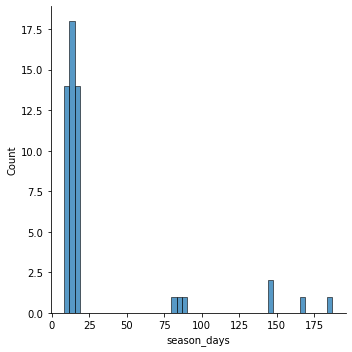

In [48]:
sns.displot(x=hosts['season_days'],bins=50)

(0.0, 5.0)

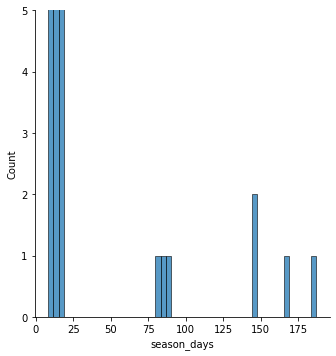

In [49]:
#lets check the outliears

sns.displot(x=hosts['season_days'],bins=50)
plt.ylim(0,5)

In [50]:
hosts[hosts['season_days']>75]

,game_end_date,game_start_date,game_location,game_name,game_season,game_year,season_days
43,1928-08-12 19:00:00+00:00,1928-05-17 07:00:00+00:00,Netherlands,Amsterdam 1928,Summer,1928,87
45,1924-07-27 19:00:00+00:00,1924-05-04 07:00:00+00:00,France,Paris 1924,Summer,1924,84
47,1920-09-12 19:00:00+00:00,1920-04-20 07:00:00+00:00,Belgium,Antwerp 1920,Summer,1920,145
48,1912-07-27 20:00:00+00:00,1912-05-05 08:00:00+00:00,Sweden,Stockholm 1912,Summer,1912,83
49,1908-10-31 20:09:00+00:00,1908-04-27 08:00:00+00:00,Great Britain,London 1908,Summer,1908,187
50,1904-11-24 02:00:00+00:00,1904-07-01 14:00:00+00:00,United States,St. Louis 1904,Summer,1904,145
51,1900-10-28 19:50:39+00:00,1900-05-14 08:50:39+00:00,France,Paris 1900,Summer,1900,167


<AxesSubplot:xlabel='game_year', ylabel='season_days'>

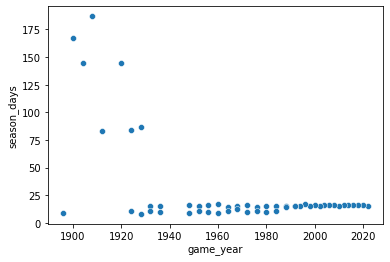

In [51]:
sns.scatterplot(x=hosts['game_year'],y=hosts['season_days'])

<AxesSubplot:xlabel='game_season', ylabel='count'>

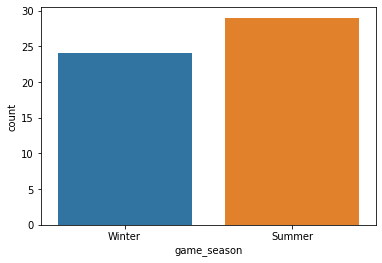

In [52]:
sns.countplot(x=hosts['game_season'])

### Medals

In [53]:
medals.head()

,discipline_title,slug_game,event_title,event_gender,medal_type,participant_type,participant_title,athlete_url,athlete_full_name,country_name,country_code,country_3_letter_code
0,Curling,beijing-2022,Mixed Doubles,Mixed,GOLD,GameTeam,Italy,https://olympics.com/en/athletes/stefania-cons...,Stefania CONSTANTINI,Italy,IT,ITA
1,Curling,beijing-2022,Mixed Doubles,Mixed,GOLD,GameTeam,Italy,https://olympics.com/en/athletes/amos-mosaner,Amos MOSANER,Italy,IT,ITA
2,Curling,beijing-2022,Mixed Doubles,Mixed,SILVER,GameTeam,Norway,https://olympics.com/en/athletes/kristin-skaslien,Kristin SKASLIEN,Norway,NO,NOR
3,Curling,beijing-2022,Mixed Doubles,Mixed,SILVER,GameTeam,Norway,https://olympics.com/en/athletes/magnus-nedreg...,Magnus NEDREGOTTEN,Norway,NO,NOR
4,Curling,beijing-2022,Mixed Doubles,Mixed,BRONZE,GameTeam,Sweden,https://olympics.com/en/athletes/almida-de-val,Almida DE VAL,Sweden,SE,SWE


In [54]:
medals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21697 entries, 0 to 21696
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   discipline_title       21697 non-null  object
 1   slug_game              21697 non-null  object
 2   event_title            21697 non-null  object
 3   event_gender           21697 non-null  object
 4   medal_type             21697 non-null  object
 5   participant_type       21697 non-null  object
 6   participant_title      6584 non-null   object
 7   athlete_url            17027 non-null  object
 8   athlete_full_name      18073 non-null  object
 9   country_name           21697 non-null  object
 10  country_code           20195 non-null  object
 11  country_3_letter_code  21697 non-null  object
dtypes: object(12)
memory usage: 2.0+ MB


In [55]:
medals.describe()

,discipline_title,slug_game,event_title,event_gender,medal_type,participant_type,participant_title,athlete_url,athlete_full_name,country_name,country_code,country_3_letter_code
count,21697,21697,21697,21697,21697,21697,6584,17027,18073,21697,20195,21697
unique,86,53,1436,4,3,2,493,12116,12895,154,143,154
top,Athletics,tokyo-2020,Individual men,Men,BRONZE,Athlete,United States team,https://olympics.com/en/athletes/michael-phelp...,Michael PHELPS,United States of America,US,USA
freq,3080,1188,215,13932,7529,15113,523,16,16,3094,3094,3094


In [56]:
medals=medals.drop(['participant_title','athlete_url','country_code'],axis=1)

In [57]:
medals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21697 entries, 0 to 21696
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   discipline_title       21697 non-null  object
 1   slug_game              21697 non-null  object
 2   event_title            21697 non-null  object
 3   event_gender           21697 non-null  object
 4   medal_type             21697 non-null  object
 5   participant_type       21697 non-null  object
 6   athlete_full_name      18073 non-null  object
 7   country_name           21697 non-null  object
 8   country_3_letter_code  21697 non-null  object
dtypes: object(9)
memory usage: 1.5+ MB


In [58]:
medals['athlete_full_name']=medals['athlete_full_name'].fillna('Name Not Available')

In [59]:
medals=medals.drop('country_3_letter_code',axis=1)

In [60]:
medals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21697 entries, 0 to 21696
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   discipline_title   21697 non-null  object
 1   slug_game          21697 non-null  object
 2   event_title        21697 non-null  object
 3   event_gender       21697 non-null  object
 4   medal_type         21697 non-null  object
 5   participant_type   21697 non-null  object
 6   athlete_full_name  21697 non-null  object
 7   country_name       21697 non-null  object
dtypes: object(8)
memory usage: 1.3+ MB


In [61]:
medals.head()

,discipline_title,slug_game,event_title,event_gender,medal_type,participant_type,athlete_full_name,country_name
0,Curling,beijing-2022,Mixed Doubles,Mixed,GOLD,GameTeam,Stefania CONSTANTINI,Italy
1,Curling,beijing-2022,Mixed Doubles,Mixed,GOLD,GameTeam,Amos MOSANER,Italy
2,Curling,beijing-2022,Mixed Doubles,Mixed,SILVER,GameTeam,Kristin SKASLIEN,Norway
3,Curling,beijing-2022,Mixed Doubles,Mixed,SILVER,GameTeam,Magnus NEDREGOTTEN,Norway
4,Curling,beijing-2022,Mixed Doubles,Mixed,BRONZE,GameTeam,Almida DE VAL,Sweden


In [62]:
medals['game_location']=medals['slug_game'].apply(lambda x:x.split('-')[0])

In [63]:
medals['game_year']=medals['slug_game'].apply(lambda x:x.split('-')[-1])

In [64]:
medals=medals.drop('slug_game',axis=1)

In [65]:
medals.head()

,discipline_title,event_title,event_gender,medal_type,participant_type,athlete_full_name,country_name,game_location,game_year
0,Curling,Mixed Doubles,Mixed,GOLD,GameTeam,Stefania CONSTANTINI,Italy,beijing,2022
1,Curling,Mixed Doubles,Mixed,GOLD,GameTeam,Amos MOSANER,Italy,beijing,2022
2,Curling,Mixed Doubles,Mixed,SILVER,GameTeam,Kristin SKASLIEN,Norway,beijing,2022
3,Curling,Mixed Doubles,Mixed,SILVER,GameTeam,Magnus NEDREGOTTEN,Norway,beijing,2022
4,Curling,Mixed Doubles,Mixed,BRONZE,GameTeam,Almida DE VAL,Sweden,beijing,2022


In [66]:
#top 5 coutntries with gold medals?

medals[medals['medal_type']=='GOLD']['country_name'].value_counts().head(5)

United States of America      1222
Soviet Union                   510
Germany                        385
People's Republic of China     333
Great Britain                  332
Name: country_name, dtype: int64

Google is showing some different result! may be there is some problem with data.

In [67]:
#in which (top 10) sport USA has won most golds?

medals[(medals['medal_type']=='GOLD') & (medals['country_name']=='United States of America')]['discipline_title'].value_counts().head(10)

Athletics              342
Swimming               258
Shooting                57
Wrestling               55
Boxing                  50
Diving                  48
Rowing                  42
Gymnastics Artistic     36
Tennis                  34
Speed skating           30
Name: discipline_title, dtype: int64

In [68]:
medals[(medals['medal_type']=='GOLD') & (medals['country_name']=='United States of America')]['game_year'].value_counts()

1984    91
1904    79
1924    50
1932    50
2012    50
2016    47
1968    47
1996    46
1992    46
1952    44
1948    43
1920    42
1988    42
2000    40
2020    40
2008    39
2004    38
1964    37
1976    37
1960    37
1956    36
1972    36
1936    26
1912    25
1928    25
1908    23
1900    19
2002    11
1896    11
2014    10
2018    10
2022     9
2006     9
2010     9
1994     6
1998     6
1980     6
Name: game_year, dtype: int64

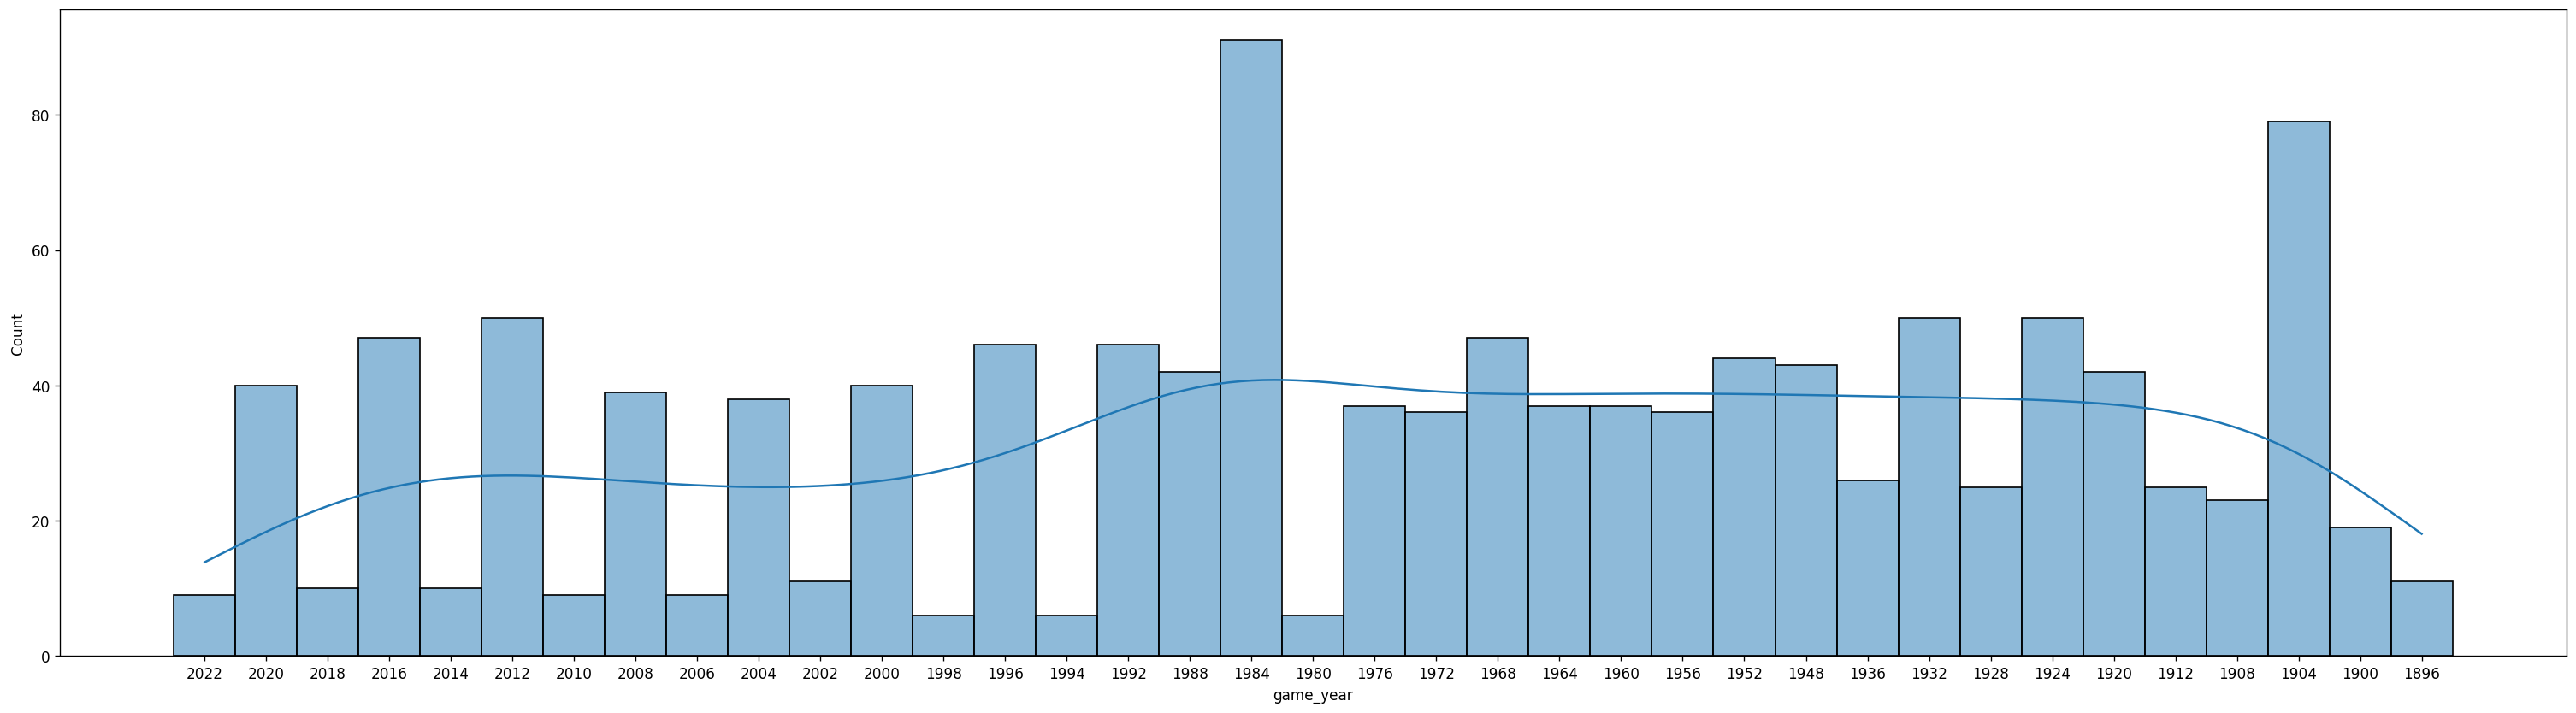

In [69]:
#USA Gold medals per year

plt.figure(figsize=(25,7),dpi=121)
sns.histplot(medals[(medals['medal_type']=='GOLD') & (medals['country_name']=='United States of America')]['game_year'],kde=True)
plt.tight_layout()
plt.savefig('gold performance.png')

  Strange! After 1992 USA has performed well on alternate seasons

In [70]:
medals[medals['country_name']=='United States of America'].groupby(['game_year','medal_type']).count()['discipline_title']

game_year  medal_type
1896       BRONZE         2
           GOLD          11
           SILVER         7
1900       BRONZE        15
           GOLD          19
                         ..
2020       GOLD          40
           SILVER        44
2022       BRONZE         9
           GOLD           9
           SILVER        10
Name: discipline_title, Length: 111, dtype: int64

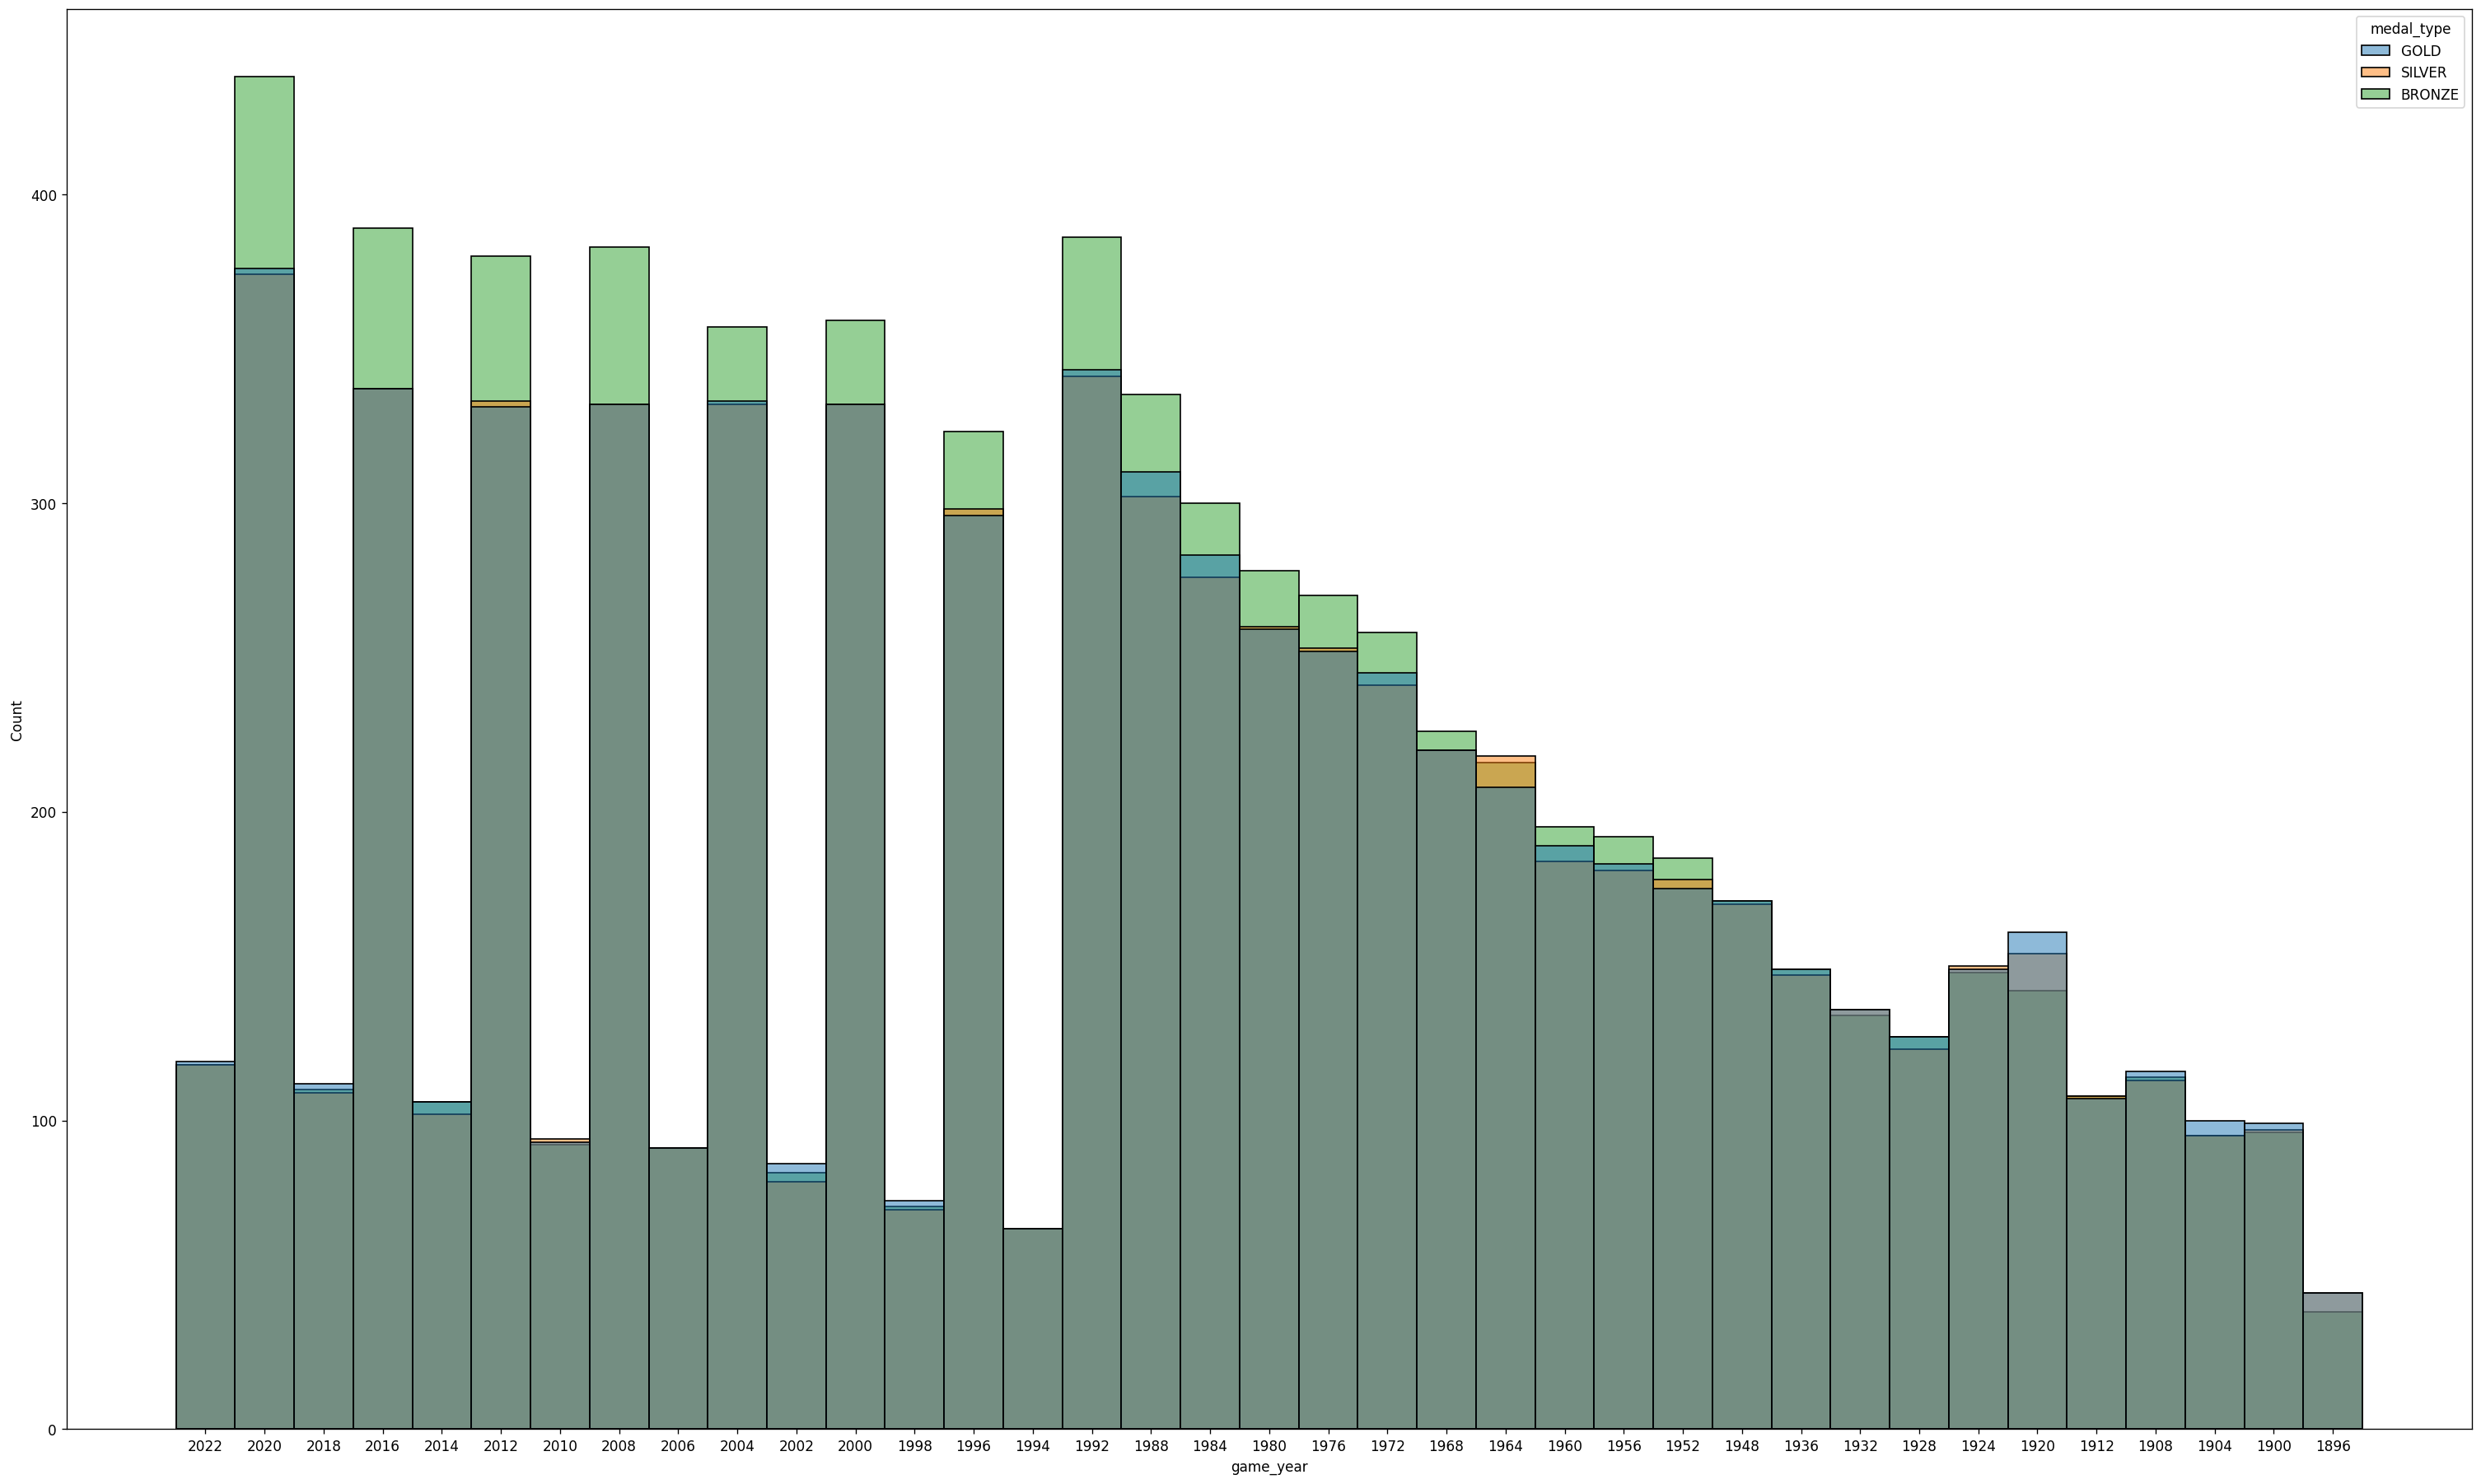

In [71]:
plt.figure(figsize=(25,15),dpi=121)
sns.histplot(x=medals['game_year'],hue=medals['medal_type'])
plt.tight_layout()


In [72]:
# in Which (Top10) games it was hard to win gold medal

medals[medals['medal_type']!='GOLD']['discipline_title'].value_counts().head(10)

Athletics              2052
Swimming               1174
Wrestling               928
Boxing                  731
Rowing                  716
Gymnastics Artistic     641
Shooting                581
Canoe Sprint            533
Sailing                 507
Judo                    455
Name: discipline_title, dtype: int64

### Results

In [144]:
import pandas as pd

In [145]:
results=pd.read_csv("olympic_results.csv")

In [146]:
results.head()

,discipline_title,event_title,slug_game,participant_type,medal_type,athletes,rank_equal,rank_position,country_name,country_code,country_3_letter_code,athlete_url,athlete_full_name,value_unit,value_type
0,Curling,Mixed Doubles,beijing-2022,GameTeam,GOLD,"[('Stefania CONSTANTINI', 'https://olympics.co...",False,1,Italy,IT,ITA,NaN,NaN,NaN,NaN
1,Curling,Mixed Doubles,beijing-2022,GameTeam,SILVER,"[('Kristin SKASLIEN', 'https://olympics.com/en...",False,2,Norway,NO,NOR,NaN,NaN,NaN,NaN
2,Curling,Mixed Doubles,beijing-2022,GameTeam,BRONZE,"[('Almida DE VAL', 'https://olympics.com/en/at...",False,3,Sweden,SE,SWE,NaN,NaN,NaN,NaN
3,Curling,Mixed Doubles,beijing-2022,GameTeam,NaN,"[('Jennifer DODDS', 'https://olympics.com/en/a...",False,4,Great Britain,GB,GBR,NaN,NaN,NaN,NaN
4,Curling,Mixed Doubles,beijing-2022,GameTeam,NaN,"[('Rachel HOMAN', 'https://olympics.com/en/ath...",False,5,Canada,CA,CAN,NaN,NaN,NaN,NaN


In [147]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162804 entries, 0 to 162803
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   discipline_title       162804 non-null  object
 1   event_title            162804 non-null  object
 2   slug_game              162804 non-null  object
 3   participant_type       162804 non-null  object
 4   medal_type             20206 non-null   object
 5   athletes               7976 non-null    object
 6   rank_equal             32526 non-null   object
 7   rank_position          158926 non-null  object
 8   country_name           162804 non-null  object
 9   country_code           157768 non-null  object
 10  country_3_letter_code  162804 non-null  object
 11  athlete_url            129991 non-null  object
 12  athlete_full_name      141646 non-null  object
 13  value_unit             78646 non-null   object
 14  value_type             90049 non-null   object
dtype

In [148]:
results=results.drop(['medal_type','athletes','rank_equal','value_unit','value_type','athlete_url','country_3_letter_code','country_code'],axis=1)

In [149]:
results.describe()

,discipline_title,event_title,slug_game,participant_type,rank_position,country_name,athlete_full_name
count,162804,162804,162804,162804,158926,162804,141646
unique,86,1567,53,2,193,238,75263
top,Athletics,individual mixed,rio-2016,Athlete,9,United States of America,Heikki SAVOLAINEN
freq,19259,2731,7672,141646,8279,11916,34


In [150]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162804 entries, 0 to 162803
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   discipline_title   162804 non-null  object
 1   event_title        162804 non-null  object
 2   slug_game          162804 non-null  object
 3   participant_type   162804 non-null  object
 4   rank_position      158926 non-null  object
 5   country_name       162804 non-null  object
 6   athlete_full_name  141646 non-null  object
dtypes: object(7)
memory usage: 8.7+ MB


In [151]:
results['athlete_full_name']=results['athlete_full_name'].fillna('Name Not Available',axis=0)

In [152]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162804 entries, 0 to 162803
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   discipline_title   162804 non-null  object
 1   event_title        162804 non-null  object
 2   slug_game          162804 non-null  object
 3   participant_type   162804 non-null  object
 4   rank_position      158926 non-null  object
 5   country_name       162804 non-null  object
 6   athlete_full_name  162804 non-null  object
dtypes: object(7)
memory usage: 8.7+ MB


In [153]:
results['rank_position']=results['rank_position'].fillna(results['rank_position'].mode,axis=0)

In [154]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162804 entries, 0 to 162803
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   discipline_title   162804 non-null  object
 1   event_title        162804 non-null  object
 2   slug_game          162804 non-null  object
 3   participant_type   162804 non-null  object
 4   rank_position      162804 non-null  object
 5   country_name       162804 non-null  object
 6   athlete_full_name  162804 non-null  object
dtypes: object(7)
memory usage: 8.7+ MB


In [155]:
results.head()

,discipline_title,event_title,slug_game,participant_type,rank_position,country_name,athlete_full_name
0,Curling,Mixed Doubles,beijing-2022,GameTeam,1,Italy,Name Not Available
1,Curling,Mixed Doubles,beijing-2022,GameTeam,2,Norway,Name Not Available
2,Curling,Mixed Doubles,beijing-2022,GameTeam,3,Sweden,Name Not Available
3,Curling,Mixed Doubles,beijing-2022,GameTeam,4,Great Britain,Name Not Available
4,Curling,Mixed Doubles,beijing-2022,GameTeam,5,Canada,Name Not Available


In [156]:
results['game_year']=results['slug_game'].apply(lambda x:x.split('-')[-1])

In [157]:
results

,discipline_title,event_title,slug_game,participant_type,rank_position,country_name,athlete_full_name,game_year
0,Curling,Mixed Doubles,beijing-2022,GameTeam,1,Italy,Name Not Available,2022
1,Curling,Mixed Doubles,beijing-2022,GameTeam,2,Norway,Name Not Available,2022
2,Curling,Mixed Doubles,beijing-2022,GameTeam,3,Sweden,Name Not Available,2022
3,Curling,Mixed Doubles,beijing-2022,GameTeam,4,Great Britain,Name Not Available,2022
4,Curling,Mixed Doubles,beijing-2022,GameTeam,5,Canada,Name Not Available,2022
...,...,...,...,...,...,...,...,...
162799,Ski Jumping,Normal Hill Individual men,chamonix-1924,Athlete,DNS,Poland,Franciszek BUJAK,1924
162800,Ski Jumping,Normal Hill Individual men,chamonix-1924,Athlete,DNS,Poland,Henryk Mückenbrunn,1924
162801,Ski Jumping,Normal Hill Individual men,chamonix-1924,Athlete,DNS,Czechoslovakia,Milda Prokopec,1924
162802,Ski Jumping,Normal Hill Individual men,chamonix-1924,Athlete,DNS,United States of America,Sigurd Overby,1924


In [158]:
#Top10 countries with Rank 1
results[results['rank_position']=='1']['country_name'].value_counts().head(10)

United States of America      1186
Soviet Union                   473
Germany                        341
France                         337
Great Britain                  300
People's Republic of China     285
Italy                          258
Sweden                         210
Norway                         210
Russian Federation             197
Name: country_name, dtype: int64

In [159]:
results[results['rank_position']=='1']

,discipline_title,event_title,slug_game,participant_type,rank_position,country_name,athlete_full_name,game_year
0,Curling,Mixed Doubles,beijing-2022,GameTeam,1,Italy,Name Not Available,2022
10,Curling,Women,beijing-2022,GameTeam,1,Great Britain,Name Not Available,2022
20,Curling,Men,beijing-2022,GameTeam,1,Sweden,Name Not Available,2022
48,Freestyle Skiing,Men's Moguls,beijing-2022,Athlete,1,Sweden,Walter WALLBERG,2022
64,Freestyle Skiing,Men's Freeski Halfpipe,beijing-2022,Athlete,1,New Zealand,Nico PORTEOUS,2022
...,...,...,...,...,...,...,...,...
162615,Alpine Skiing,slalom men,lake-placid-1980,Athlete,1,Sweden,Ingemar STENMARK,1980
162698,Equestrian Jumping,Jumping Individual mixed,montreal-1976,Athlete,1,Federal Republic of Germany,Alwin SCHOCKEMÖHLE,1976
162745,Figure skating,Ice dancing mixed,innsbruck-1976,GameTeam,1,Soviet Union,Name Not Available,1976
162763,Ski Jumping,Normal Hill Individual men,chamonix-1924,Athlete,1,Norway,Jacob Tullin THAMS,1924


In [160]:
results[(results['country_name']=='United States of America')]

,discipline_title,event_title,slug_game,participant_type,rank_position,country_name,athlete_full_name,game_year
7,Curling,Mixed Doubles,beijing-2022,GameTeam,8,United States of America,Name Not Available,2022
15,Curling,Women,beijing-2022,GameTeam,6,United States of America,Name Not Available,2022
23,Curling,Men,beijing-2022,GameTeam,4,United States of America,Name Not Available,2022
32,Freestyle Skiing,Men's Moguls,beijing-2022,Athlete,16,United States of America,Dylan WALCZYK,2022
49,Freestyle Skiing,Men's Moguls,beijing-2022,Athlete,25,United States of America,Bradley WILSON,2022
...,...,...,...,...,...,...,...,...
162761,Figure skating,Ice dancing mixed,innsbruck-1976,GameTeam,17,United States of America,Name Not Available,1976
162765,Ski Jumping,Normal Hill Individual men,chamonix-1924,Athlete,3,United States of America,Anders HAUGEN,1924
162776,Ski Jumping,Normal Hill Individual men,chamonix-1924,Athlete,14,United States of America,La Moine Batson,1924
162778,Ski Jumping,Normal Hill Individual men,chamonix-1924,Athlete,16,United States of America,Harry LIEN,1924


In [161]:
results.groupby(['game_year','rank_position']).count()

discipline_title  \
game_year rank_position                                                          
1896      <bound method Series.mode of 0           1\n1  ...               118   
          1                                                                 43   
          10                                                                 1   
          11                                                                 1   
          12                                                                 2   
...                                                                        ...   
2022      DSQ                                                                8   
          LAP                                                                3   
          PEN                                                               13   
          WDR                                                                4   
          YCD                                                                2   

                                                              event_title  \
game_year rank_position                                                     
1896      <bound method Series.mode of 0           1\n1  ...          118   
          1                                                            43   
          10                                                            1   
          11                                                            1   
          12                                                            2   
...                                                                   ...   
2022      DSQ                                                           8   
          LAP                                                           3   
          PEN                                                          13   
          WDR                                                           4   
          YCD                                                           2   

                                                              slug_game  \
game_year rank_position                                                   
1896      <bound method Series.mode of 0           1\n1  ...        118   
          1                                                          43   
          10                                                          1   
          11                                                          1   
          12                                                          2   
...                                                                 ...   
2022      DSQ                                                         8   
          LAP                                                         3   
          PEN                                                        13   
          WDR                                                         4   
          YCD                                                         2   

                                                              participant_type  \
game_year rank_position                                                          
1896      <bound method Series.mode of 0           1\n1  ...               118   
          1                                                                 43   
          10                                                                 1   
          11                                                                 1   
          12                                                                 2   
...                                                                        ...   
2022      DSQ                                                                8   
          LAP                                                                3   
          PEN                                                               13   
          WDR                                                                4   
          YCD                    

In [134]:
results[results['rank_position']==results[results['game_year']=='1896']['rank_position'].unique()[12]]

,discipline_title,event_title,slug_game,participant_type,rank_position,country_name,athlete_full_name,game_year
2182,Alpine Skiing,Men's Alpine Combined,beijing-2022,Athlete,<bound method Series.mode of 0 1\n1 ...,Czech Republic,Jan ZABYSTRAN,2022
2185,Alpine Skiing,Men's Alpine Combined,beijing-2022,Athlete,<bound method Series.mode of 0 1\n1 ...,France,Alexis PINTURAULT,2022
2191,Alpine Skiing,Men's Alpine Combined,beijing-2022,Athlete,<bound method Series.mode of 0 1\n1 ...,Switzerland,Yannick CHABLOZ,2022
2192,Alpine Skiing,Men's Alpine Combined,beijing-2022,Athlete,<bound method Series.mode of 0 1\n1 ...,Switzerland,Luca AERNI,2022
2193,Alpine Skiing,Men's Alpine Combined,beijing-2022,Athlete,<bound method Series.mode of 0 1\n1 ...,Chile,Henrik VON APPEN,2022
...,...,...,...,...,...,...,...,...
162552,Shooting,army rifle 300m men,athens-1896,Athlete,<bound method Series.mode of 0 1\n1 ...,Greece,- Antelothanasis,1896
162741,Equestrian Jumping,Jumping Individual mixed,montreal-1976,Athlete,<bound method Series.mode of 0 1\n1 ...,Australia,Barry Thomas ROYCROFT,1976
162742,Equestrian Jumping,Jumping Individual mixed,montreal-1976,Athlete,<bound method Series.mode of 0 1\n1 ...,Austria,Heinrich (Henk) HULZEBOS,1976
162743,Equestrian Jumping,Jumping Individual mixed,montreal-1976,Athlete,<bound method Series.mode of 0 1\n1 ...,Bolivia,Roberto NIELSEN-REYES,1976


In [135]:
faulty_rank_positions=results[results['rank_position']==results[results['game_year']=='1896']['rank_position'].unique()[12]]

In [136]:
faulty_rank_positions.index

Int64Index([  2182,   2185,   2191,   2192,   2193,   2195,   2196,   2200,
              2202,   2204,
            ...
            162547, 162548, 162549, 162550, 162551, 162552, 162741, 162742,
            162743, 162744],
           dtype='int64', length=3878)

In [137]:
results['rank_position'].iloc[faulty_rank_positions.index[0]]=results['rank_position'].mode()[0]

In [138]:
results['rank_position'].iloc[2182]

'9'

In [139]:
results['rank_position'].mode()[0]

'9'

In [140]:
for index in range(len(faulty_rank_positions.index)):
    results['rank_position'].iloc[faulty_rank_positions.index[index]]=results['rank_position'].mode()[0]
    
    

In [141]:
#Yearwise Rank position
results.groupby(['game_year','rank_position']).count()

discipline_title  event_title  slug_game  \
game_year rank_position                                             
1896      1                            43           43         43   
          10                            1            1          1   
          11                            1            1          1   
          12                            2            2          2   
          2                            43           43         43   
...                                   ...          ...        ...   
2022      DSQ                           8            8          8   
          LAP                           3            3          3   
          PEN                          13           13         13   
          WDR                           4            4          4   
          YCD                           2            2          2   

                         participant_type  country_name  athlete_full_name  
game_year rank_position                                                     
1896      1                            43            43                 43  
          10                            1             1                  1  
          11                            1             1                  1  
          12                            2             2                  2  
          2                            43            43                 43  
...                                   ...           ...                ...  
2022      DSQ                           8             8                  8  
          LAP                           3             3                  3  
          PEN                          13            13                 13  
          WDR                           4             4                  4  
          YCD                           2             2                  2  

[3678 rows x 6 columns]

In [142]:
results['rank_position'].iloc[25].index

<function str.index>

In [143]:
for i in range(len(results['rank_position'])):
    if results['rank_position'].iloc[i].isnumeric()==False:
        #results['rank_position']=results['rank_position'].replace()
        results['rank_position']=results['rank_position'].drop(index=i,axis=0)

In [101]:
results['rank_position']=results['rank_position'].fillna(results['rank_position'].mode()[0],axis=0)

In [102]:
results['rank_position']=results['rank_position'].astype(int)

<AxesSubplot:xlabel='game_year', ylabel='rank_position'>

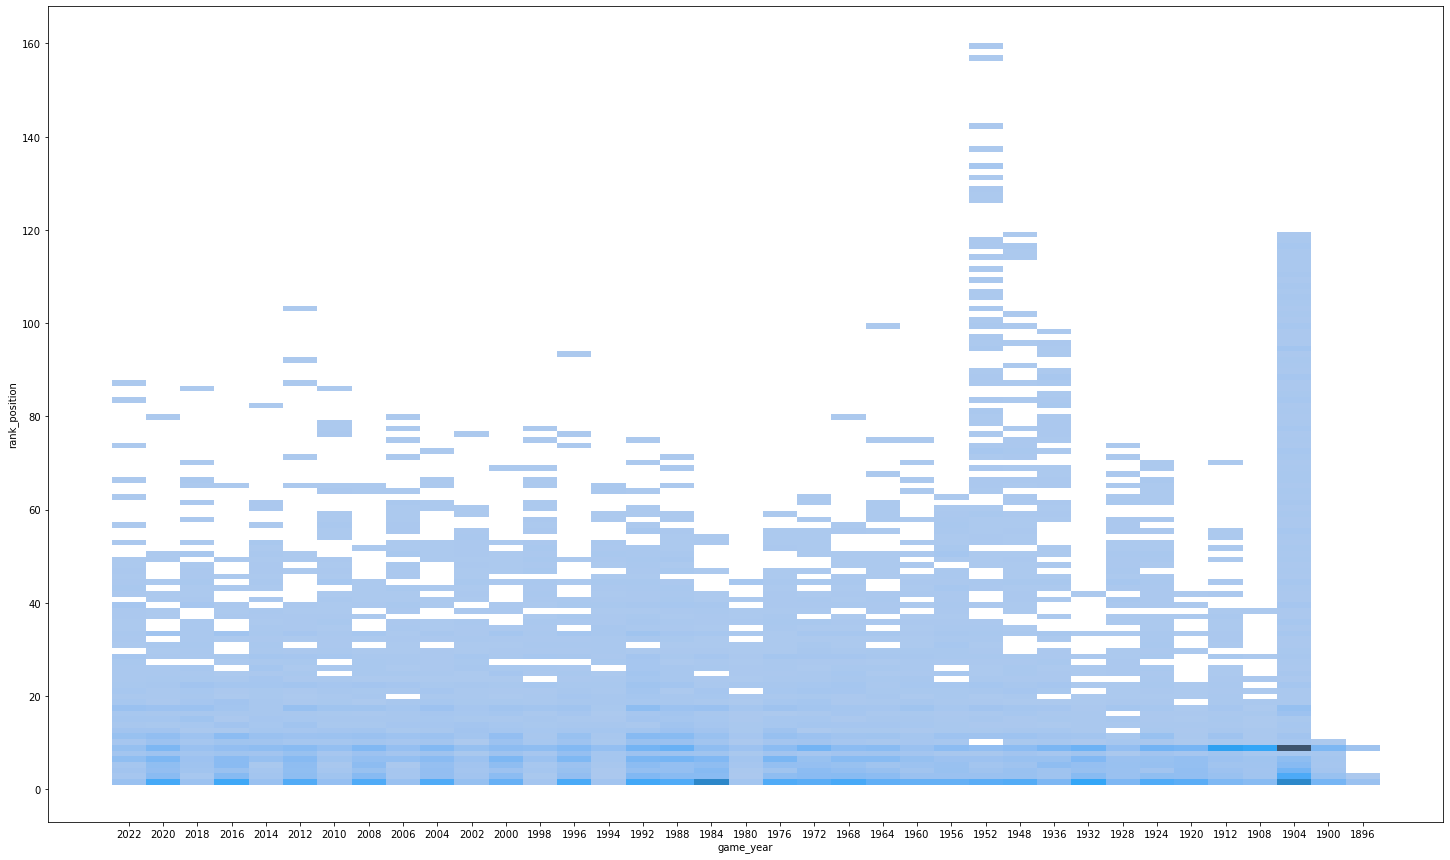

In [103]:
#Distribution of ranks of USA over the year
plt.figure(figsize=(25,15))
sns.histplot(x=results[results['country_name']=='United States of America']['game_year'],y=results[results['country_name']=='United States of America']['rank_position'])